# Part I - (Dataset Exploration Title)
## Introduction

This dataset contains information about United States flights from 1987 to 2020. It includes things like the date of the flight, the carrier, departing and arriving airports, delays, and reasons for delays.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tracemalloc

In [3]:
pd.set_option('display.max_columns', None)

I am starting by loading in the dataset while making sure to set the encoding so I don't run into any issues.

In [4]:
df = pd.read_csv('airline_2m.csv', encoding='latin-1', low_memory=False)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,NaN,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,NaN,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,1630,1644.0,14.0,14.0,0.0,0.0,1600-1659,9.0,1653.0,1936.0,6.0,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1305,1305.0,0.0,0.0,0.0,0.0,1300-1359,23.0,1328.0,2008.0,7.0,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,1820,1911.0,51.0,51.0,1.0,3.0,1800-1859,19.0,1930.0,2050.0,8.0,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,NaN,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In order to make analysis easier, I have looked over the columns and created a list of the ones I am interested in analyzing. I then create a new DataFrame with just those columns

In [5]:
wanted_cols = [0, 4, 5, 6, 18, 27, 31, 42, 47, 49, 52, 54, 56, 57, 58, 59, 60]

trim_df = df.iloc[:, wanted_cols]
trim_df.head()

,Year,DayOfWeek,FlightDate,Reporting_Airline,OriginStateName,DestStateName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,5,1998-01-02,NW,Minnesota,Utah,19.0,23.0,0.0,0.0,153.0,991.0,NaN,NaN,NaN,NaN,NaN
1,2009,4,2009-05-28,FL,Wisconsin,Florida,-2.0,0.0,0.0,0.0,141.0,1066.0,NaN,NaN,NaN,NaN,NaN
2,2013,6,2013-06-29,MQ,Colorado,Texas,14.0,-3.0,0.0,0.0,103.0,773.0,NaN,NaN,NaN,NaN,NaN
3,2010,2,2010-08-31,DL,California,Michigan,0.0,-20.0,0.0,0.0,220.0,1979.0,NaN,NaN,NaN,NaN,NaN
4,2006,7,2006-01-15,US,New Jersey,North Carolina,51.0,32.0,0.0,0.0,80.0,529.0,0.0,0.0,0.0,0.0,32.0


I'm also going to be looking at just a 5 year period of the data from 2013-2018. This date range gives me a good amount of information, while avoiding any COVID related noise. So below, I will take just the records that fall in those years.

In [6]:
trim_df = trim_df[trim_df['Year'].between(2013,2018)]
trim_df.head()

,Year,DayOfWeek,FlightDate,Reporting_Airline,OriginStateName,DestStateName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2,2013,6,2013-06-29,MQ,Colorado,Texas,14.0,-3.0,0.0,0.0,103.0,773.0,NaN,NaN,NaN,NaN,NaN
9,2018,4,2018-02-08,WN,Illinois,Texas,16.0,29.0,0.0,0.0,114.0,793.0,0.0,0.0,13.0,0.0,16.0
11,2014,4,2014-04-03,WN,Texas,Texas,0.0,-5.0,0.0,0.0,77.0,562.0,NaN,NaN,NaN,NaN,NaN
13,2013,7,2013-06-30,OO,New Mexico,California,-4.0,-19.0,0.0,0.0,95.0,677.0,NaN,NaN,NaN,NaN,NaN
17,2015,6,2015-09-05,AS,Utah,Washington,-12.0,-23.0,0.0,0.0,102.0,689.0,NaN,NaN,NaN,NaN,NaN


Now I want to look at subsetting the data based on the top Airlines. So I will look at the value_counts of the Reporting_Airline field.

In [7]:
trim_df['Reporting_Airline'].value_counts()

WN    77922
DL    54252
AA    46475
OO    40519
UA    33407
EV    31140
B6    16704
MQ    14564
AS    11109
US    10636
NK     5999
F9     5742
9E     5695
HA     4818
YV     3691
VX     3427
YX     3266
OH     2856
FL     2591
G4      953
Name: Reporting_Airline, dtype: int64

There seems to be a clear delineation between the 6th (EV) and 7th (B6) airlines, with EV having nearly double the flights as B6 in this time frame. So I will use this as my breaking point of top airlines. Below I will create a list of the top 6 airlines, then update the DataFrame with just the records from those airlines.

In [8]:
top_airlines = trim_df['Reporting_Airline'].value_counts()[:6].index

trim_df = trim_df[trim_df['Reporting_Airline'].isin(top_airlines)]
trim_df.head()

,Year,DayOfWeek,FlightDate,Reporting_Airline,OriginStateName,DestStateName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
9,2018,4,2018-02-08,WN,Illinois,Texas,16.0,29.0,0.0,0.0,114.0,793.0,0.0,0.0,13.0,0.0,16.0
11,2014,4,2014-04-03,WN,Texas,Texas,0.0,-5.0,0.0,0.0,77.0,562.0,NaN,NaN,NaN,NaN,NaN
13,2013,7,2013-06-30,OO,New Mexico,California,-4.0,-19.0,0.0,0.0,95.0,677.0,NaN,NaN,NaN,NaN,NaN
19,2017,3,2017-07-26,WN,California,California,NaN,NaN,1.0,0.0,NaN,373.0,NaN,NaN,NaN,NaN,NaN
20,2013,2,2013-09-17,UA,Louisiana,Illinois,-10.0,-12.0,0.0,0.0,119.0,837.0,NaN,NaN,NaN,NaN,NaN


I also only want to look at non-cancelled and non-diverted flights, so I am going to remove those from the dataset. I'll do this by filtering on rows whose Cancelled and Diverted columns don't equal 1. I can then drop the Cancelled and Diverted columns as they are no longer needed.

In [9]:
trim_df = trim_df[(trim_df['Cancelled'] != 1) & (trim_df['Diverted'] != 1)].reset_index(drop=True)
trim_df.drop(['Cancelled', 'Diverted'], axis=1, inplace=True)

trim_df.head()

,Year,DayOfWeek,FlightDate,Reporting_Airline,OriginStateName,DestStateName,DepDelay,ArrDelay,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018,4,2018-02-08,WN,Illinois,Texas,16.0,29.0,114.0,793.0,0.0,0.0,13.0,0.0,16.0
1,2014,4,2014-04-03,WN,Texas,Texas,0.0,-5.0,77.0,562.0,NaN,NaN,NaN,NaN,NaN
2,2013,7,2013-06-30,OO,New Mexico,California,-4.0,-19.0,95.0,677.0,NaN,NaN,NaN,NaN,NaN
3,2013,2,2013-09-17,UA,Louisiana,Illinois,-10.0,-12.0,119.0,837.0,NaN,NaN,NaN,NaN,NaN
4,2013,3,2013-04-10,EV,Missouri,Georgia,-2.0,-2.0,85.0,563.0,NaN,NaN,NaN,NaN,NaN


I also want to replace the abbreviations in the Reporting_Airline column with the actual company names so it is easier to keep track of who is who. And I'll also replace the DayOfWeek number with the actual name of the day.

In [10]:
trim_df['Reporting_Airline'] = trim_df['Reporting_Airline'].replace({'AA': 'American Airlines', 'DL': 'Delta Air Lines',
                                                                     'EV': 'ExpressJet Airlines', 'OO': 'SkyWest Airlines',
                                                                     'UA': 'United Air Lines', 'WN': 'Southwest'})

In [11]:
trim_df['DayOfWeek'] = trim_df['DayOfWeek'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
                                                     6: 'Saturday', 7: 'Sunday'})

Now I can look at its information to see if there is anything I need to cleanup before I begin.

In [12]:
trim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278904 entries, 0 to 278903
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               278904 non-null  int64  
 1   DayOfWeek          278904 non-null  object 
 2   FlightDate         278904 non-null  object 
 3   Reporting_Airline  278904 non-null  object 
 4   OriginStateName    278904 non-null  object 
 5   DestStateName      278904 non-null  object 
 6   DepDelay           278904 non-null  float64
 7   ArrDelay           278904 non-null  float64
 8   AirTime            278904 non-null  float64
 9   Distance           278904 non-null  float64
 10  CarrierDelay       52944 non-null   float64
 11  WeatherDelay       52944 non-null   float64
 12  NASDelay           52944 non-null   float64
 13  SecurityDelay      52944 non-null   float64
 14  LateAircraftDelay  52944 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 31

There are null values in the Delay columns. These columns say how much of a delay there was on each flight due to the different category of delay. The nulls in these categories should be zeros. So, I will replace all the nulls with zeros.

In [13]:
delay_cats = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

trim_df[delay_cats] = trim_df[delay_cats].fillna(0)

trim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278904 entries, 0 to 278903
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               278904 non-null  int64  
 1   DayOfWeek          278904 non-null  object 
 2   FlightDate         278904 non-null  object 
 3   Reporting_Airline  278904 non-null  object 
 4   OriginStateName    278904 non-null  object 
 5   DestStateName      278904 non-null  object 
 6   DepDelay           278904 non-null  float64
 7   ArrDelay           278904 non-null  float64
 8   AirTime            278904 non-null  float64
 9   Distance           278904 non-null  float64
 10  CarrierDelay       278904 non-null  float64
 11  WeatherDelay       278904 non-null  float64
 12  NASDelay           278904 non-null  float64
 13  SecurityDelay      278904 non-null  float64
 14  LateAircraftDelay  278904 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 31

Now that the nulls have been dealt with, there are many columns that aren't in the right Dtype. I'll create a dictionary with the columns and their correcct dtype, then use the astype() function to update them all accordingly. This will also help lower the memory usage and speed things up.

In [14]:
col_dtypes = {'Year': 'int16', 'DayOfWeek': 'category', 'FlightDate': 'datetime64[ns]', 'Reporting_Airline': 'category',
              'DepDelay': 'int16', 'ArrDelay': 'int16', 'AirTime': 'int16', 'Distance': 'int16', 'CarrierDelay': 'int16',
              'WeatherDelay': 'int16', 'NASDelay': 'int16', 'SecurityDelay': 'int16', 'LateAircraftDelay': 'int16'}

trim_df = trim_df.astype(col_dtypes)

trim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278904 entries, 0 to 278903
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               278904 non-null  int16         
 1   DayOfWeek          278904 non-null  category      
 2   FlightDate         278904 non-null  datetime64[ns]
 3   Reporting_Airline  278904 non-null  category      
 4   OriginStateName    278904 non-null  object        
 5   DestStateName      278904 non-null  object        
 6   DepDelay           278904 non-null  int16         
 7   ArrDelay           278904 non-null  int16         
 8   AirTime            278904 non-null  int16         
 9   Distance           278904 non-null  int16         
 10  CarrierDelay       278904 non-null  int16         
 11  WeatherDelay       278904 non-null  int16         
 12  NASDelay           278904 non-null  int16         
 13  SecurityDelay      278904 non-null  int16   

I'm also going to want to be able to look at the data on a by Airline basis, so I will group the data by airline, and get the means of each column.

In [15]:
airline_df = trim_df.iloc[:,np.r_[3,6:15]].groupby('Reporting_Airline', as_index=False).mean(numeric_only=True).copy()
airline_df

,Reporting_Airline,DepDelay,ArrDelay,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,American Airlines,9.352469,5.044870,139.067885,1033.695908,3.873983,0.626269,2.865632,0.017974,4.478705
1,Delta Air Lines,7.670219,0.752284,117.993093,870.603658,3.244244,0.714835,2.380709,0.002079,2.735722
2,ExpressJet Airlines,11.991726,8.773078,73.304621,469.355530,5.140884,0.348624,3.714562,0.000434,6.117865
3,SkyWest Airlines,8.798774,6.437041,73.973232,478.317582,4.167066,0.585917,2.435982,0.014456,5.414714
4,Southwest,11.379227,5.815840,102.882819,738.511181,3.023142,0.414317,1.559677,0.012144,5.455707
5,United Air Lines,11.148237,3.824414,161.907735,1243.772809,3.336254,0.522210,3.505594,0.009126,4.792335


Using the total number of flights will also be valuable, so I am going to add those to the DataFrame. I'll do this by starting to get a count of each airline's number of flights into its own DataFrame

In [16]:
flight_count = trim_df.groupby('Reporting_Airline', as_index=False).count().iloc[:,0:2].rename(columns={'Year': "Num_Flights"})
flight_count

,Reporting_Airline,Num_Flights
0,American Airlines,45621
1,Delta Air Lines,53860
2,ExpressJet Airlines,29975
3,SkyWest Airlines,39637
4,Southwest,76830
5,United Air Lines,32981


And now I can merge it together with the airline DataFrame to have all the relevant data together.

In [17]:
airline_df = pd.merge(airline_df, flight_count, on='Reporting_Airline')
airline_df

,Reporting_Airline,DepDelay,ArrDelay,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Num_Flights
0,American Airlines,9.352469,5.044870,139.067885,1033.695908,3.873983,0.626269,2.865632,0.017974,4.478705,45621
1,Delta Air Lines,7.670219,0.752284,117.993093,870.603658,3.244244,0.714835,2.380709,0.002079,2.735722,53860
2,ExpressJet Airlines,11.991726,8.773078,73.304621,469.355530,5.140884,0.348624,3.714562,0.000434,6.117865,29975
3,SkyWest Airlines,8.798774,6.437041,73.973232,478.317582,4.167066,0.585917,2.435982,0.014456,5.414714,39637
4,Southwest,11.379227,5.815840,102.882819,738.511181,3.023142,0.414317,1.559677,0.012144,5.455707,76830
5,United Air Lines,11.148237,3.824414,161.907735,1243.772809,3.336254,0.522210,3.505594,0.009126,4.792335,32981


### What is the structure of your dataset?

The original dataset was structured as rows of individual flights. I have grouped them by airline to be able to see how different airlines perform in different categories.

### What is/are the main feature(s) of interest in your dataset?

The main features of the dataset are the delay times for all flights.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the different types of delays, as well as the length of the delays will help with my investigation.

## Univariate Exploration

I want to start by looking at how long all flights end up being delayed. So I will create a histogram of every flights ArrDelay to see if there are any trends.

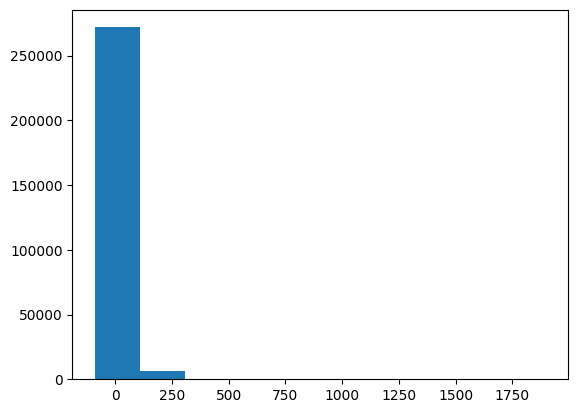

In [18]:
plt.hist(data=trim_df, x='ArrDelay');

The chart looks to be heavily skewed to the right due to some outliers. I'll see if I can discern anything interesting after removing some of the extremes. I'll just look at delays of less than 250 minutes to get an idea of a typical delay.

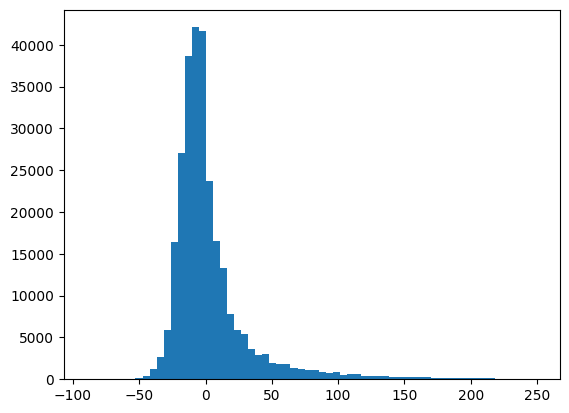

In [19]:
plt.hist(data=trim_df[trim_df['ArrDelay'] <= 250], x='ArrDelay', bins=64);

While still obviously skewed to the right, most flights arrive within 30 minutes of their expected arrival time.

Since I'll be looking at a few top airlines, it makes sense to see how they stack up against each other in regards to total number of flights during the time period. To see this, I will create a Seaborn Countplot. I will set the order of the bars in descending value by using the value_counts function on the Reporting_Airline column.

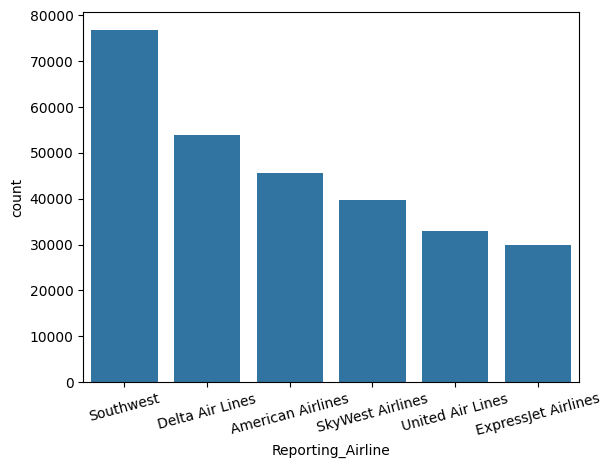

In [20]:
order = trim_df['Reporting_Airline'].value_counts().index.tolist()

sns.countplot(data=trim_df, x='Reporting_Airline', color='tab:blue', order=order)
plt.xticks(rotation=15); 

Southwest is clearly running the most flights with the difference between them and the second most active airline, Delta, being nearly the same as the difference between Delta and ExpressJet, the least active of these airlines.

I also want to take a look at the average delay for each airlines' flights to see if any airline is doing significantly better than the other.

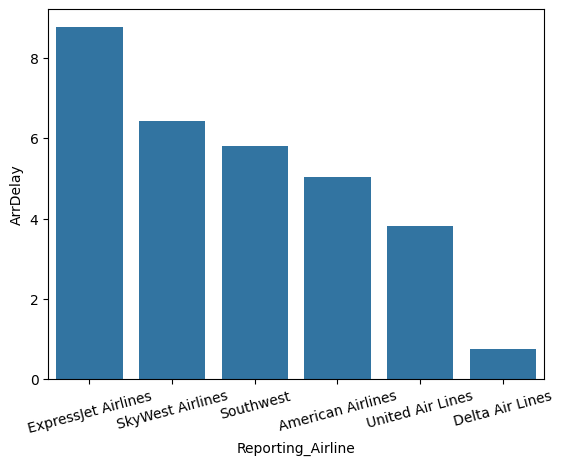

In [21]:
order = airline_df.sort_values(['ArrDelay'], ascending=False)['Reporting_Airline'].tolist()

sns.barplot(data=airline_df, x='Reporting_Airline', y='ArrDelay', color='tab:blue', order=order)
plt.xticks(rotation=15);

Delat has a huge lead over the other airlines with their flights only being delayed by less than a minute on average. Compare this to ExpressJet, whose flights are delayed an average of over 8 minutes. This is a large difference between airlines.

## Bivariate Exploration

I'm curious to see if the distance traveled of a flight plays into the flight's delay. I'll investigate this by plotting the Distance against the ArrDelay on a scatterplot.

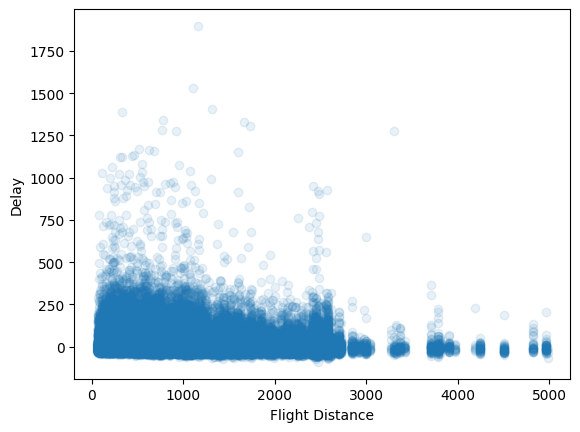

In [22]:
plt.scatter(data=trim_df, x='Distance', y='ArrDelay', alpha=0.1)
plt.xlabel('Flight Distance')
plt.ylabel('Delay');

Looking at the scatterplot, it looks like there is little to no correlation. I can confirm this by using the corr function on the two columns.

In [23]:
trim_df['Distance'].corr(trim_df['ArrDelay'])

-0.028288107704329633

This confirms what I was seeing in the scatterplot. There is essentially no correlation between the two variables.

Now I'd like to take a look at flight delays on different days of the week. I am wondering if certain days are more prone to longer delay times.

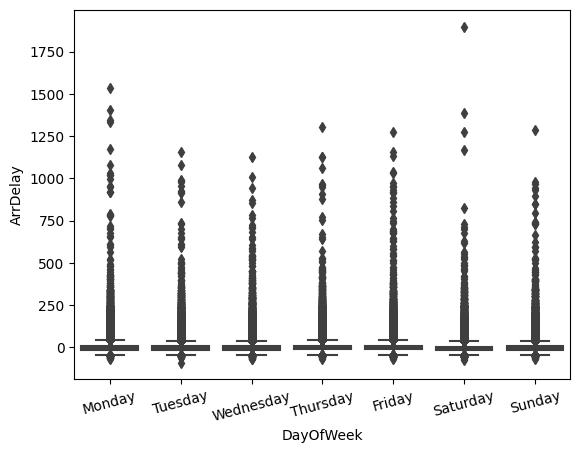

In [24]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(data=trim_df, x='DayOfWeek', y='ArrDelay', color='tab:blue', order=order)
plt.xticks(rotation=15);

The outliers are spreading the data out too much and making it hard to see any trends. So, I'll remove some of them to get a better look at the bulk of the data.

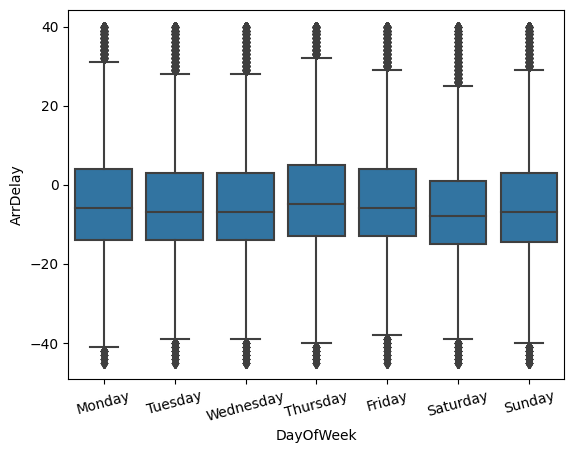

In [25]:
sns.boxplot(data=trim_df[trim_df['ArrDelay'].between(-45,40)], x='DayOfWeek', y='ArrDelay', color='tab:blue', order=order)
plt.xticks(rotation=15);

All the days of the week seem to be about the same. There are some slight variations, but not enough of a difference to be noteworth.

I want to look at the average length of delay by airline. I'm interested in if there are any trends across airlines or between delay types. To easily plot this, I will need to change the structure of how the different delays and their times are displayed. I need to use the melt function to create a column for both the DelayType and the DelayAmount. Then I will use only the rows that have a DelayAmount of over 0, to get only flights that have been delayed.

In [26]:
delay_df = trim_df.melt(id_vars=trim_df.iloc[:,:10], value_vars=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                                                                'LateAircraftDelay'],
                        var_name='DelayType',
                        value_name='DelayAmount')

delay_df = delay_df[delay_df['DelayAmount'] > 0][['Reporting_Airline', 'DelayType', 'DelayAmount']].reset_index(drop=True)

delay_df.head()

,Reporting_Airline,DelayType,DelayAmount
0,Southwest,CarrierDelay,2
1,Southwest,CarrierDelay,24
2,United Air Lines,CarrierDelay,22
3,Delta Air Lines,CarrierDelay,7
4,Southwest,CarrierDelay,11


Now that I have this updated structure, I can create a clustered bar chart looking at the average delay for both delay types, by airline.

In [27]:
def create_barplot(data, x_var, y_var, z_var, order, rotate_x):
    sns.barplot(data=delay_df, x=x_var, y=y_var, hue=z_var, errorbar=None, palette='tab20', order=order)
    plt.xticks(rotation=rotate_x);

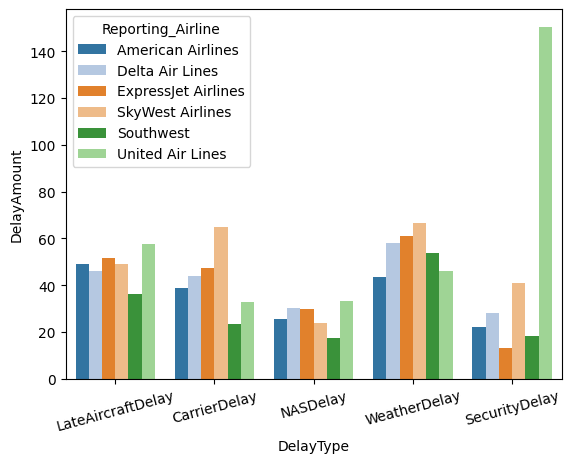

In [28]:
order = ['LateAircraftDelay', 'CarrierDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']

create_barplot(delay_df, 'DelayType', 'DelayAmount', 'Reporting_Airline', order, 15)

The first thing that stands out is United's Security Delay. I'll take a look at the records that would fall into this category and see what's going on.

In [29]:
UAL_SD = delay_df[(delay_df['Reporting_Airline'] == 'United Air Lines') & (delay_df['DelayType'] == 'SecurityDelay')]

There were only two records that fit this description. One being a 219 minute delay and the other 82 minutes. These are both way above the average for the other airlines and are clearly skewing the data. While they are data points that I should keep in mind, I am going to remove them for now so I can get a better view of the rest of the data.

In [30]:
delay_df.drop(UAL_SD.index, inplace=True)

Now that I have dropped those records, I'll run the clustered bar chart again to look over the data.

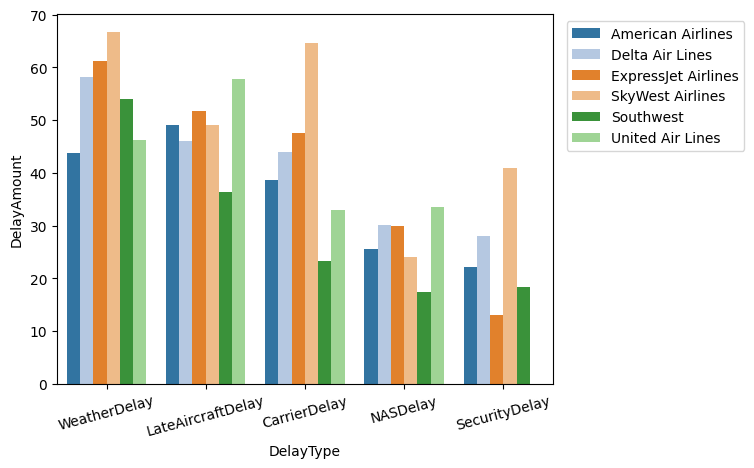

In [31]:
order = ['WeatherDelay', 'LateAircraftDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay']

create_barplot(delay_df, 'DelayType', 'DelayAmount', 'Reporting_Airline', order, 15)
plt.legend(bbox_to_anchor=(1.4, 1));

Weather Delays seem to cause the longest delays compared to other types. This makes sense intuitively as weather patterns typically aren't short events.

Looking at the Carrier Delay, which are caused by the respective airlines, Southwest is by far the best at these, having only around 25 minute delays, while SkyWest is on the opposite end of the spectrum, having significantly longer delays averaging 65 minutes.

## Multivariate Exploration

I want to look at how well the top airlines do at flying to the most popular states. I'll do this by creating a facet plot of the airlines and their average arrival delays for each of the top 10 most popular state destinations.

To start I will see who the most popular states to fly to are.

In [32]:
trim_df['DestStateName'].value_counts()

California                                        37375
Texas                                             33946
Georgia                                           22014
Florida                                           19573
Illinois                                          19166
Colorado                                          12636
New York                                           9628
Arizona                                            9153
Nevada                                             8277
Michigan                                           7728
Minnesota                                          7573
North Carolina                                     7116
Virginia                                           6967
Utah                                               6596
New Jersey                                         5904
Missouri                                           5863
Maryland                                           5214
Tennessee                                       

I'm just going to look at states with over 10,000 flights going to them, so that would be the top 6 states.

In [33]:
top_states = trim_df['DestStateName'].value_counts().head(6).index.tolist()
top_states

['California', 'Texas', 'Georgia', 'Florida', 'Illinois', 'Colorado']

Now that I have these, I will create a DataFrame with just flights going to these locations only containing the columns I'm interested in

In [34]:
top_states_df = trim_df[trim_df['DestStateName'].isin(top_states)].reset_index(drop=False)
top_states_df = top_states_df[['Reporting_Airline', 'DestStateName', 'ArrDelay']]

I can now create a facet plot looking at these variables.

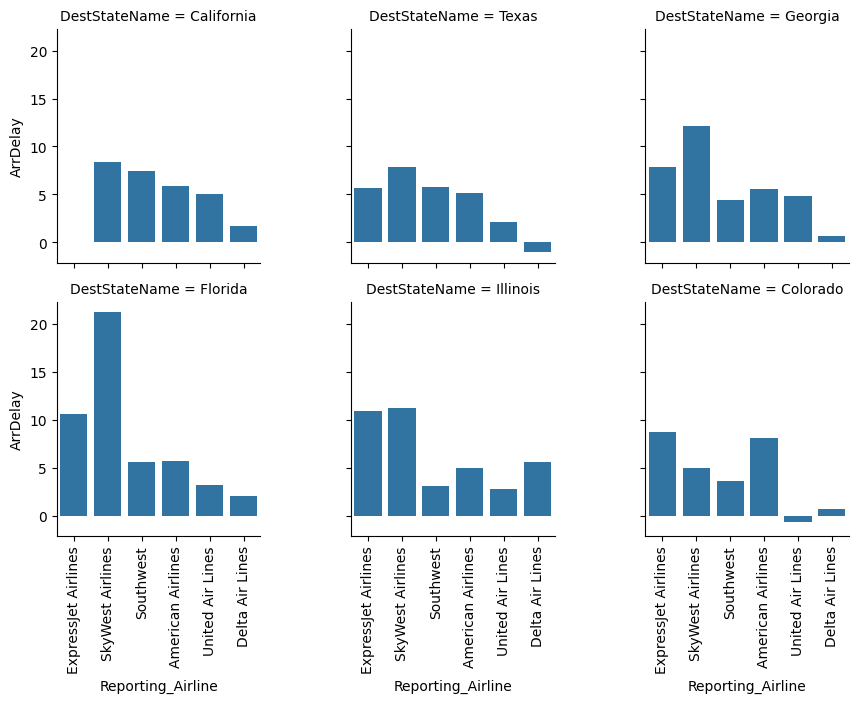

In [35]:
order = airline_df.sort_values(['ArrDelay'], ascending=False)['Reporting_Airline'].tolist()

g = sns.FacetGrid(data=top_states_df, col='DestStateName', col_wrap=3, col_order=top_states, margin_titles=True)
g.map(sns.barplot, 'Reporting_Airline', 'ArrDelay', color='tab:blue', errorbar=None, order=order)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

From an earlier analysis, I already knew Delta had the lowest average arrival delays, and breaking this down by top Destination State seems to follow this. Delta has the lowest average delay in 4 out of the 6 states with Illinois and Colorado being the outsiders, and those are relatively close.

While ExpressJet has the overall highest average arrival delay, SkyWest has the highest average in 5 of the top 6 states, with ExpressJet higher only when going to Colorado. One thing to note though, ExpressJet does not fly to California and therefore has no data for flights there.

Nest, I want to take a look at the relationships between Departure Delays, Air Time, Flight Distance, and the Arrival Delay to see if there are any strong relationships. I'll do this by creating a plot matrices of scatterplots with those variables.

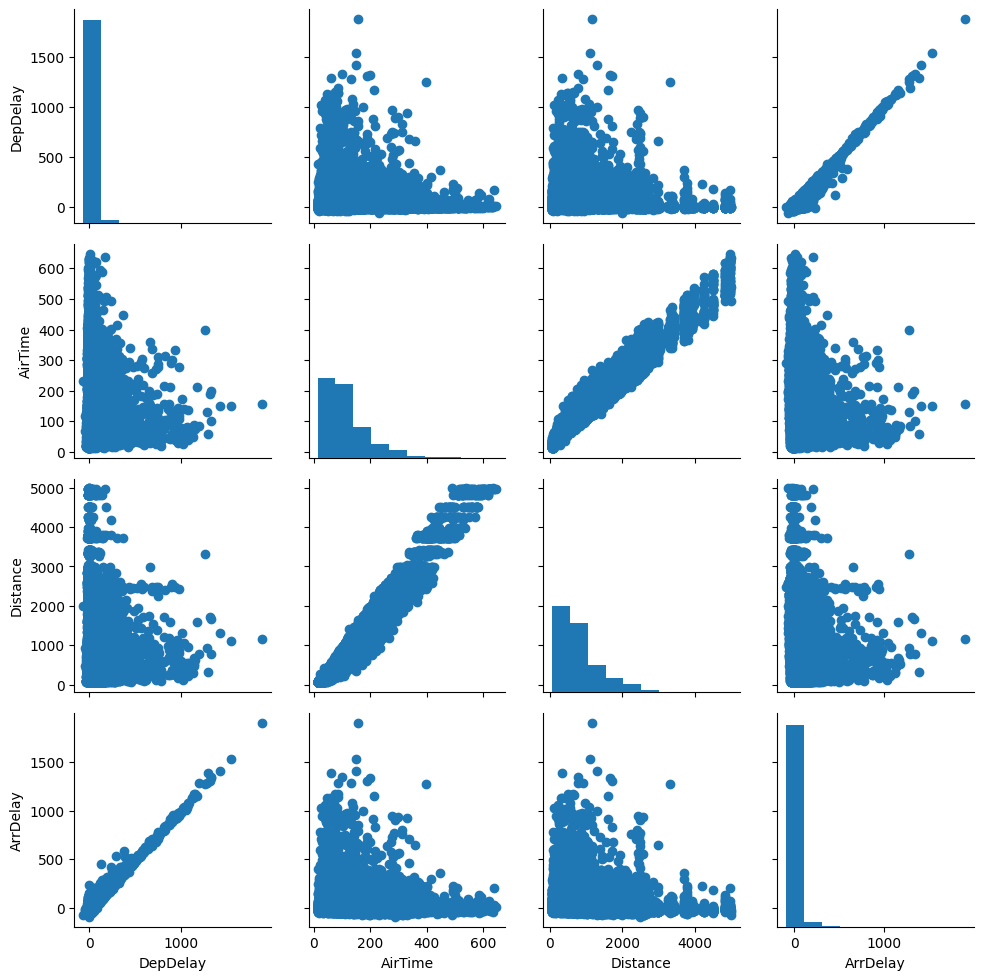

In [34]:
stats = ['DepDelay', 'AirTime', 'Distance', 'ArrDelay']
g = sns.PairGrid(data=trim_df, vars=stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

There are some unsuprisingly strong relationships between the Arrival Delay and the Departure Delay, as well as the flight's Air Time and it's Distance. But, besides those, the other relationships seem to be non-existent. To confirm this, I will create a quick heatmap showing the different correlation statistics.

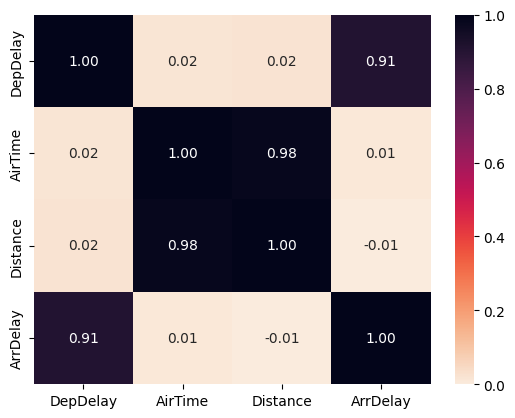

In [35]:
sns.heatmap(df[stats].corr(), cmap='rocket_r', annot=True,
          fmt='.2f', vmin=0,);

The heatmap puts numbers to what I was seeing visually in the scatter plots and confirms my thoughts.

## Conclusions
I looked at multiple different relationships and while some weren't of interest, there were others that provided useful information. Some of the things that stood out to me were:

* The majority of flights are arriving within 30 minutes, with the approximate median being on time.
* The airline you choose can make a difference in delay times. Delta Air Lines has an average delay of less than a minute, while ExpressJet's delays average nearly 9 minutes.
* While some delays can be out of the airlines hands, carrier delays are solely based on things they control. Southwest is the best at limiting these with average delays only taking 3 minutes, while SkyWest is on the opposite end of the spectrum, with their average carrier delays being over 5 minutes.

### Saving DataFrames

I am going to save the final DataFrames I created as CSV's so I can use them in the Explanatory Phase if necessary.

In [36]:
trim_df.to_csv('trim_df.csv', index=False)
airline_df.to_csv('airline_df.csv', index=False)
delay_df.to_csv('delay_df.csv', index=False)
top_states_df.to_csv('top_states_df.csv', index=False)